# Insurance Claim Fraud Detection

<img src="kkk.jpg" width="500" height="100" />

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects//master/Automobile_insurance_fraud.csv ')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Exploratory Data Analysis(EDA)

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.isin(['?','','-']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [7]:
df['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

In [8]:
df['property_damage'].value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

In [9]:
df['police_report_available'].value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [11]:
df['authorities_contacted'].value_counts(dropna=False)

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
NaN           91
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

<Axes: >

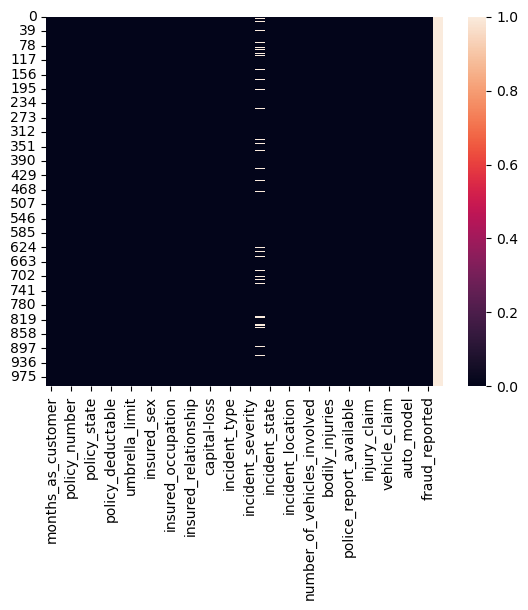

In [13]:
#Visulizing above data with Heatmap
sns.heatmap(df.isnull())

In [14]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# Data Processing

In [15]:
 # Dealing with '?' mark .
df['property_damage'] = df['property_damage'].str.strip().replace('?', 'NO')
df['police_report_available'] = df['police_report_available'].str.strip().replace('?', 'NO')
df['collision_type'] = df['collision_type'].str.strip().replace('?', 'UNKNOWN')

#checking changes
print(df.isnull().sum())

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [16]:
#since data with 1000 rows and _c39 has 1000 entirely 'NaN' value we shall drop it

df = df.drop('_c39', axis=1)

In [17]:
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y


In [18]:
# Dropping unnecessary columns
columns_to_drop = [
    'policy_number','insured_zip','incident_location', 'auto_make','auto_model','incident_state','policy_bind_date','incident_date', 
    'incident_city','incident_hour_of_the_day','auto_year','policy_state','insured_hobbies'
]

df.drop(columns=columns_to_drop, inplace=True)

In [19]:
df.head(2)

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y


In [20]:
# Now we need to deal with NaN in authorities_contacted
# Filling missing values with the mode

df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)

In [21]:
df['police_report_available'].value_counts()

police_report_available
NO     686
YES    314
Name: count, dtype: int64

# Data Visualisation

# 1. Distribution of Fraudulent and Non-Fraudulent Claims

fraud_reported
N    753
Y    247
Name: count, dtype: int64


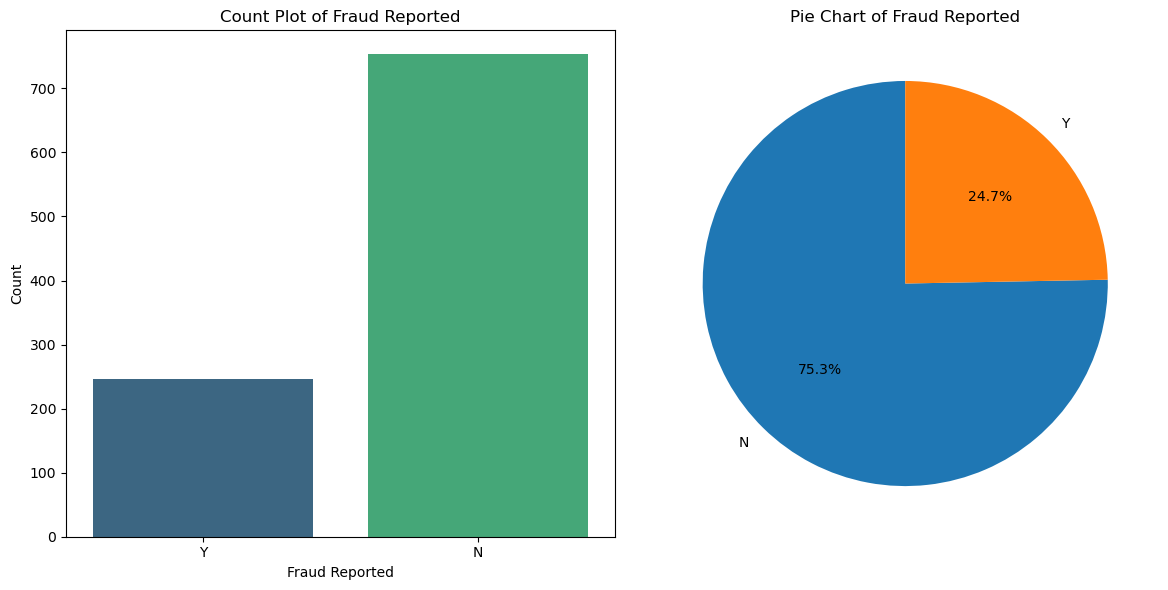

In [22]:
print(df['fraud_reported'].value_counts())

# plot count and pie for fraud reported for better understanding
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Count plot for 'fraud_reported'
sns.countplot(x='fraud_reported', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Count Plot of Fraud Reported')
axes[0].set_xlabel('Fraud Reported')
axes[0].set_ylabel('Count')

# Pie chart for 'fraud_reported'
fraud_counts = df['fraud_reported'].value_counts()
axes[1].pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of Fraud Reported')


plt.tight_layout()
plt.show()

# 2.Count Plot for insured_sex

insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64


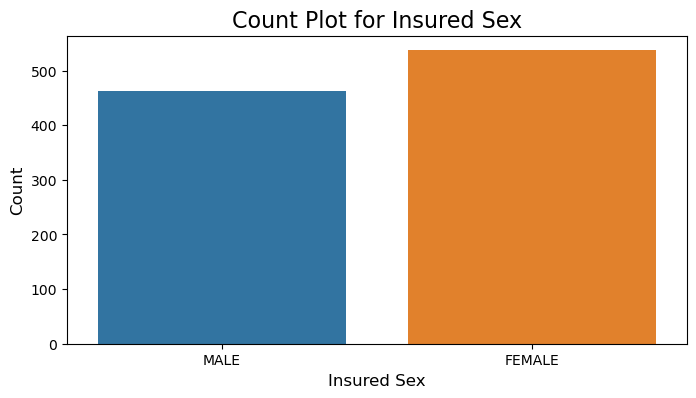

In [23]:
print(df['insured_sex'].value_counts())

#Plot
plt.figure(figsize=(8, 4))

sns.countplot(x='insured_sex', data=df)
plt.title('Count Plot for Insured Sex', fontsize=16)
plt.xlabel('Insured Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 3.Count Plot for insured_education_level

insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64


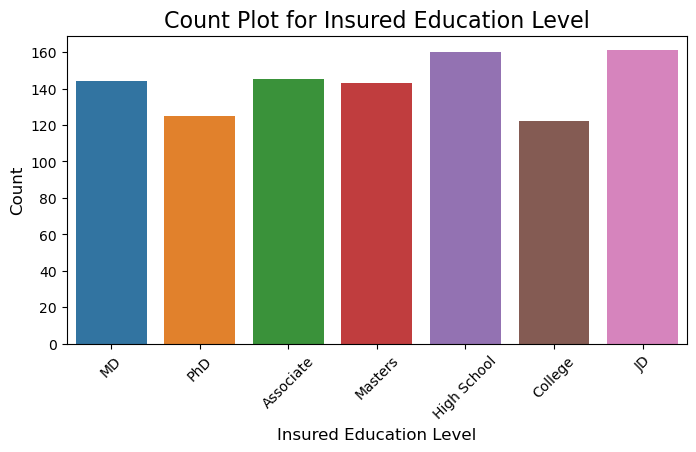

In [24]:
print(df['insured_education_level'].value_counts())

#Plot
plt.figure(figsize=(8, 4))

sns.countplot(x='insured_education_level', data=df)
plt.title('Count Plot for Insured Education Level', fontsize=16)
plt.xlabel('Insured Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  
plt.show()


# 4.Count Plot for insured_occupation

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64


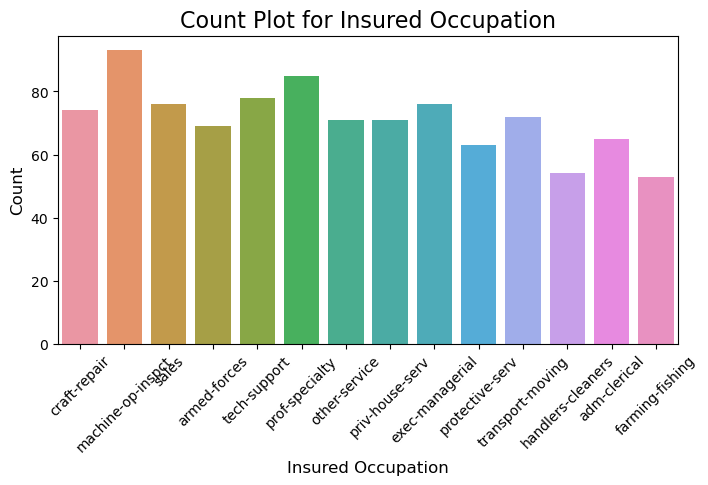

In [25]:
print(df['insured_occupation'].value_counts())

#Plot
plt.figure(figsize=(8, 4))

sns.countplot(x='insured_occupation', data=df)
plt.title('Count Plot for Insured Occupation', fontsize=16)
plt.xlabel('Insured Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  
plt.show()

# 5.Count Plot for incident_type

incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64


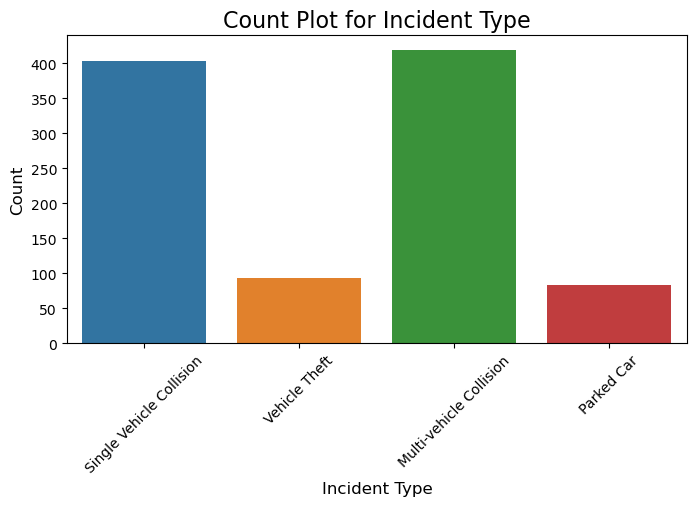

In [26]:
print(df['incident_type'].value_counts())

#Plot
plt.figure(figsize=(8, 4))

sns.countplot(x='incident_type', data=df)
plt.title('Count Plot for Incident Type', fontsize=16)
plt.xlabel('Incident Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

# 6.Count Plot for incident_severity

incident_severity
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: count, dtype: int64


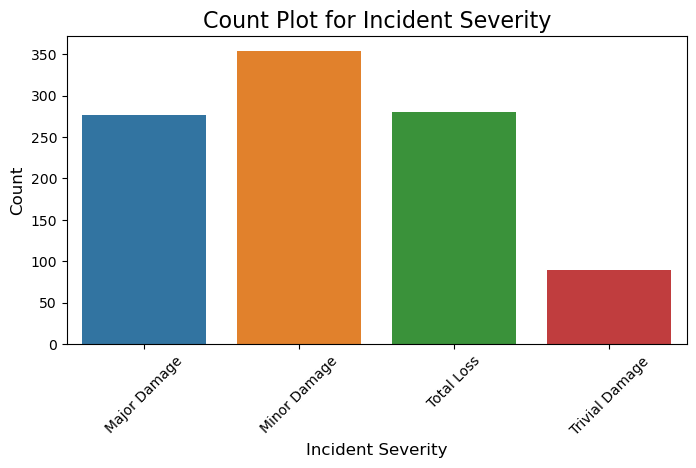

In [27]:
print(df['incident_severity'].value_counts())

#Plot
plt.figure(figsize=(8, 4))

sns.countplot(x='incident_severity', data=df)
plt.title('Count Plot for Incident Severity', fontsize=16)
plt.xlabel('Incident Severity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  
plt.show()

# 7.Count Plot for authorities_contacted

authorities_contacted
Police       383
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64


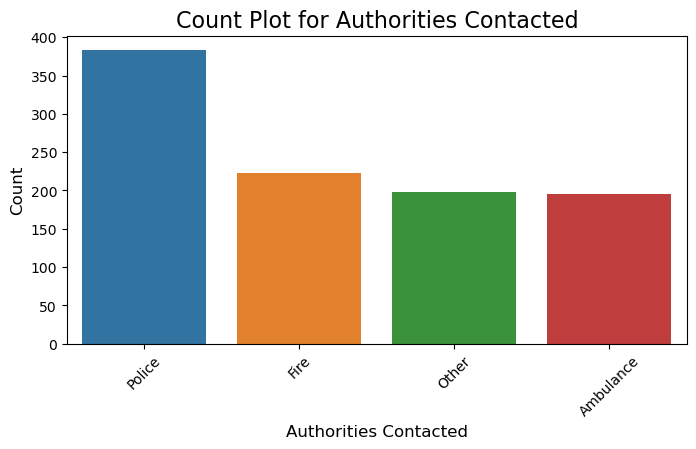

In [28]:
print(df['authorities_contacted'].value_counts())

#Plot
plt.figure(figsize=(8, 4))

sns.countplot(x='authorities_contacted', data=df)
plt.title('Count Plot for Authorities Contacted', fontsize=16)
plt.xlabel('Authorities Contacted', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

# Histogram for numerical columns

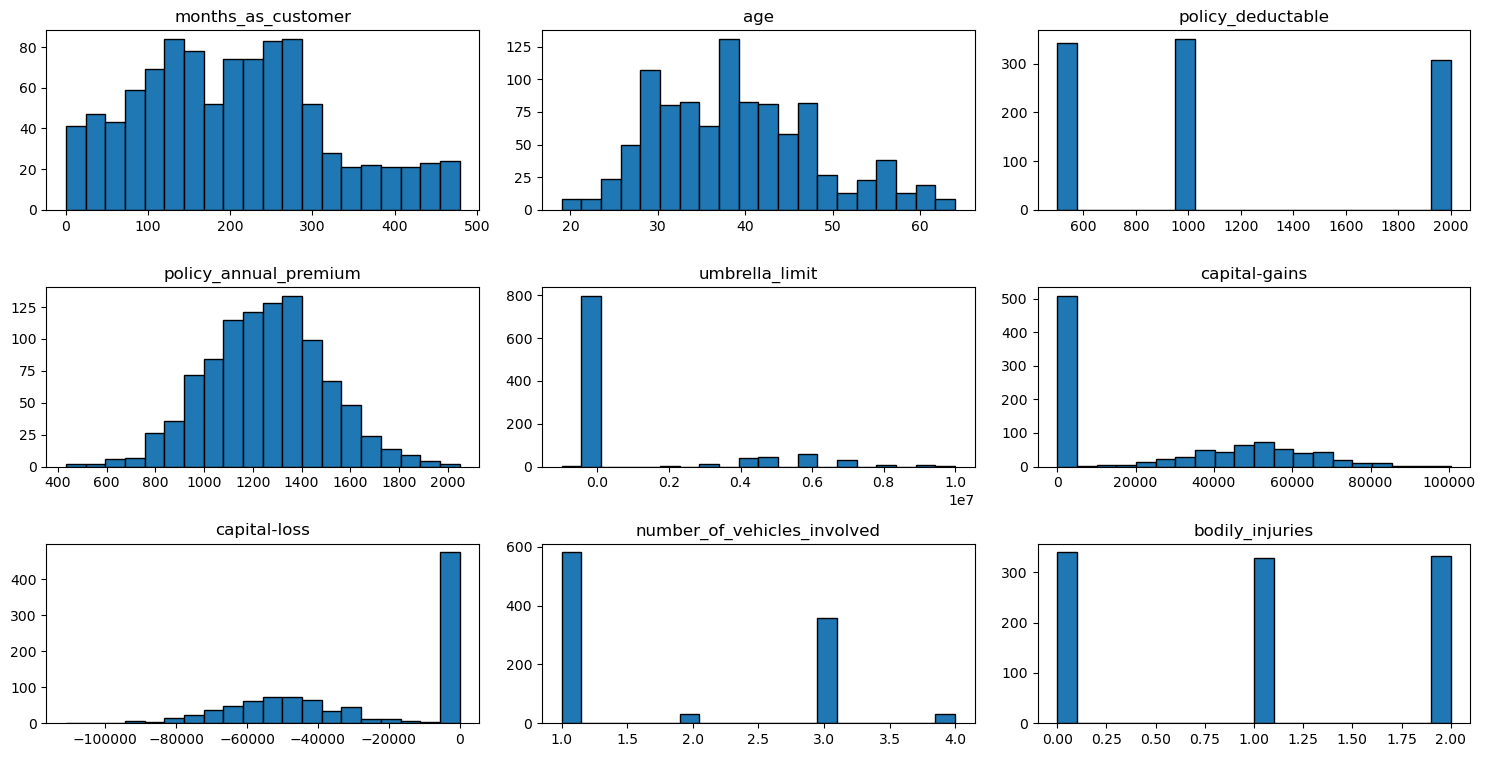

In [38]:
# plot

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols[:9], 1):  
    plt.subplot(4, 3, i)  
    plt.hist(df[col], bins=20, edgecolor='black')  
    plt.title(col)

plt.tight_layout()
plt.show()


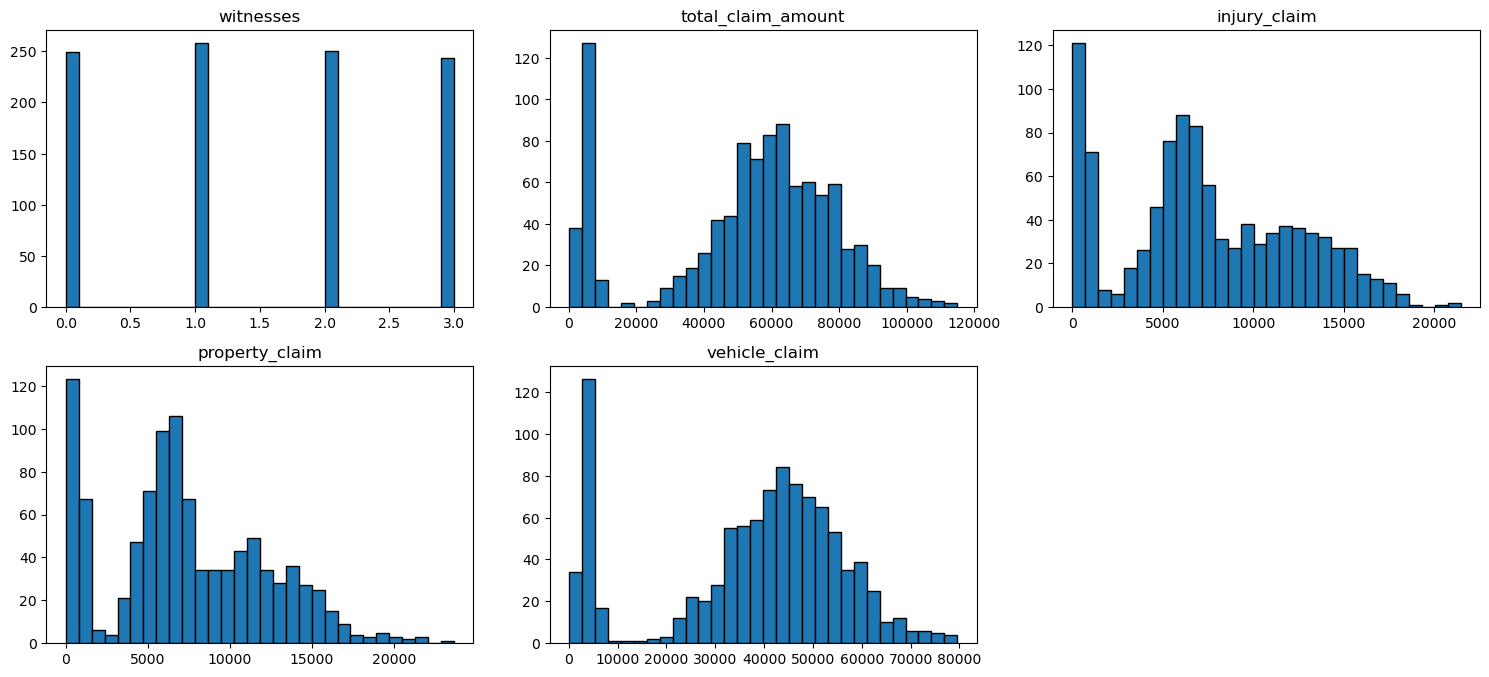

In [39]:
#Plot

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols[9:], 1):  
    plt.subplot(3, 3, i)  
    plt.hist(df[col], bins=30, edgecolor='black')  
    plt.title(col)

plt.tight_layout()
plt.show()

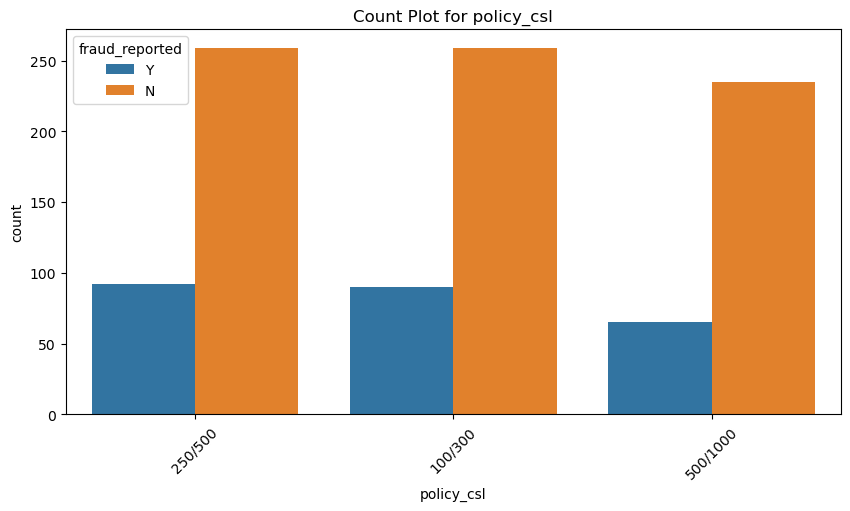

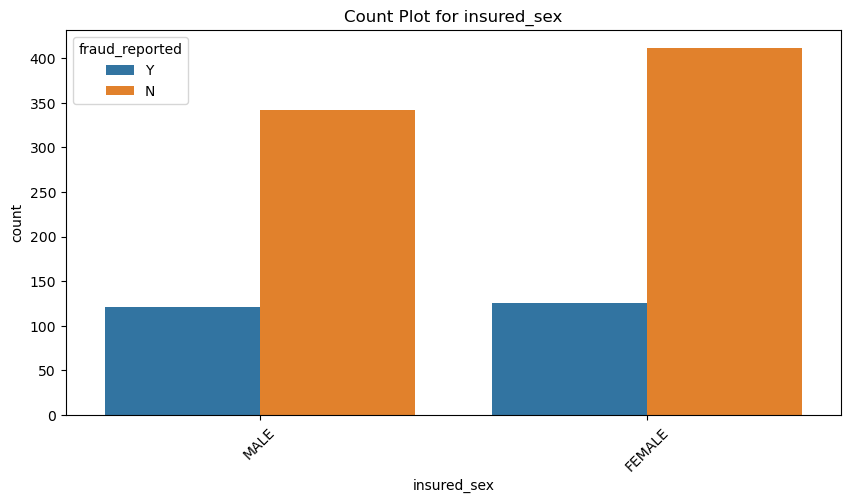

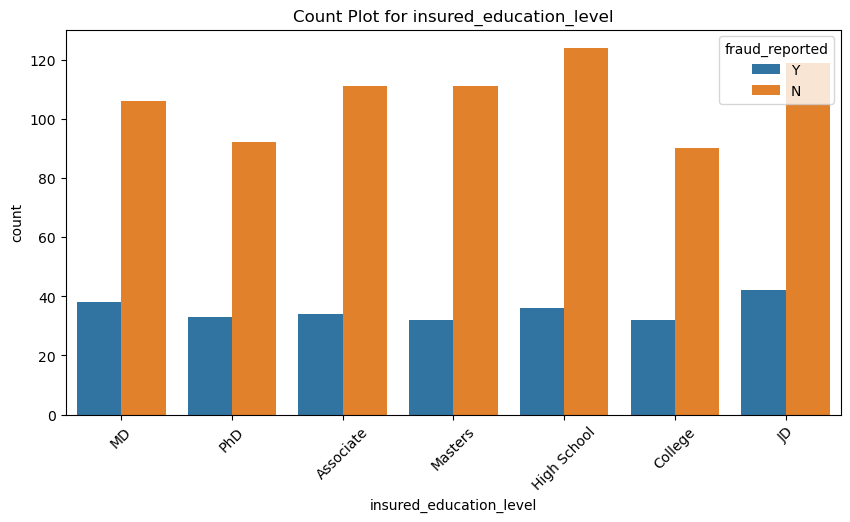

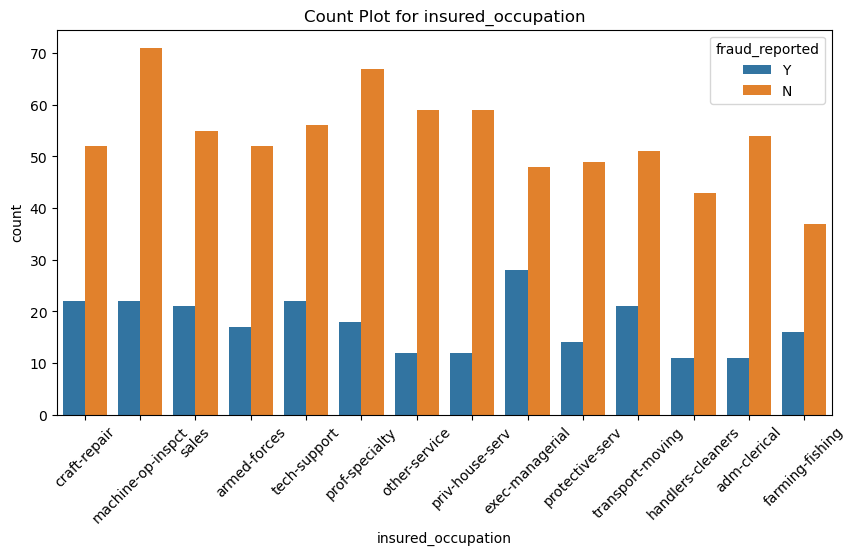

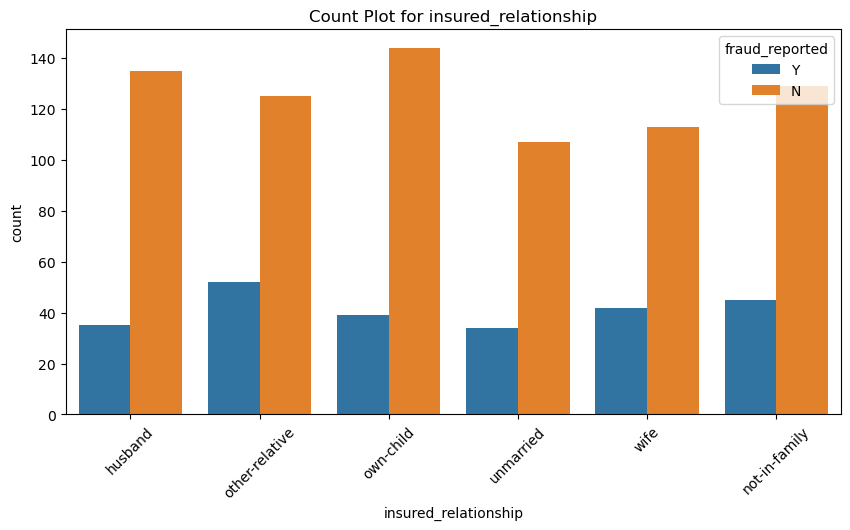

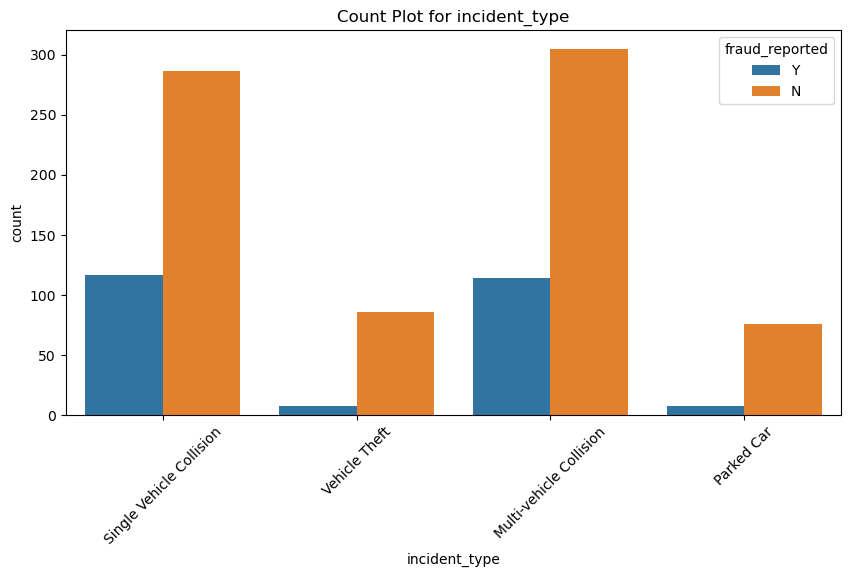

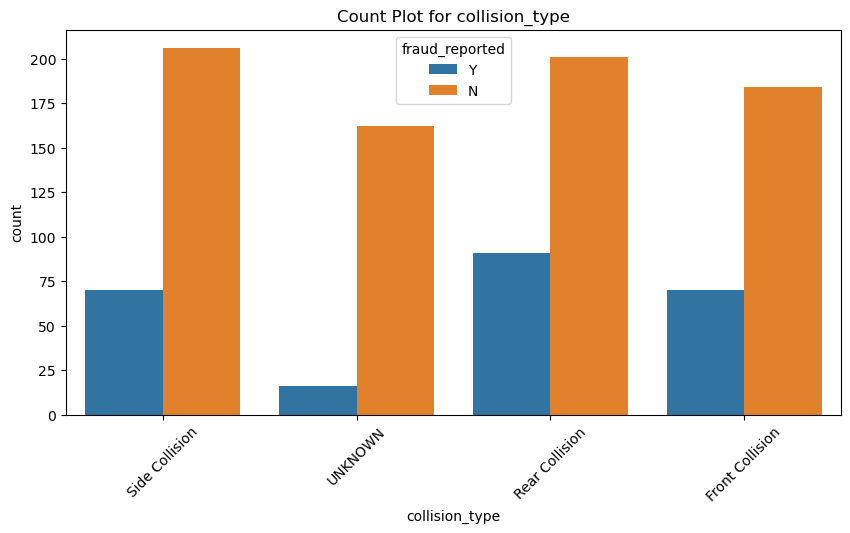

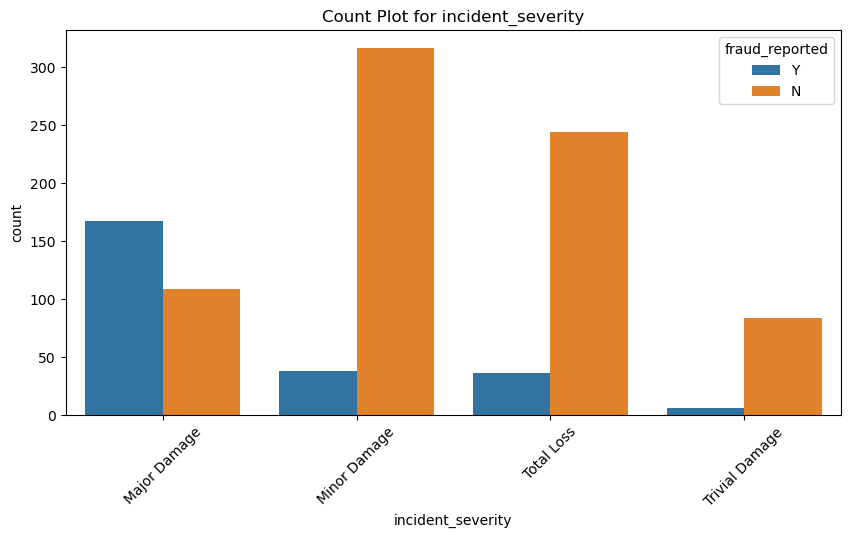

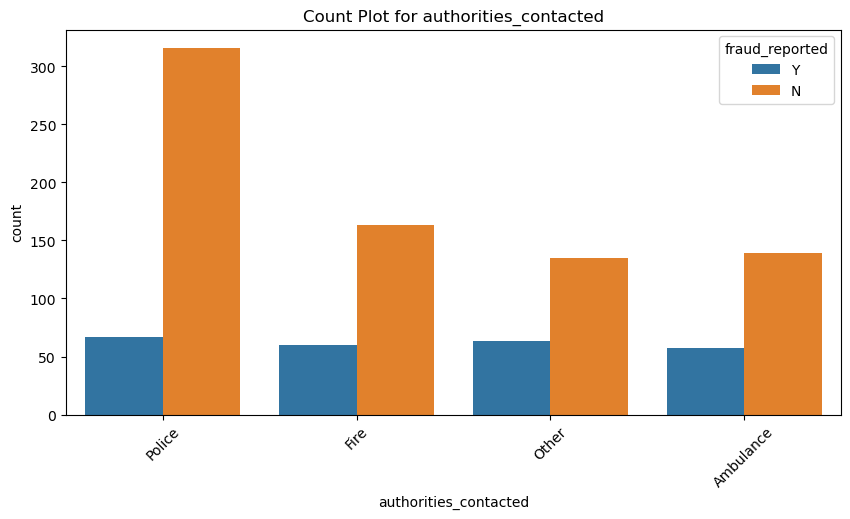

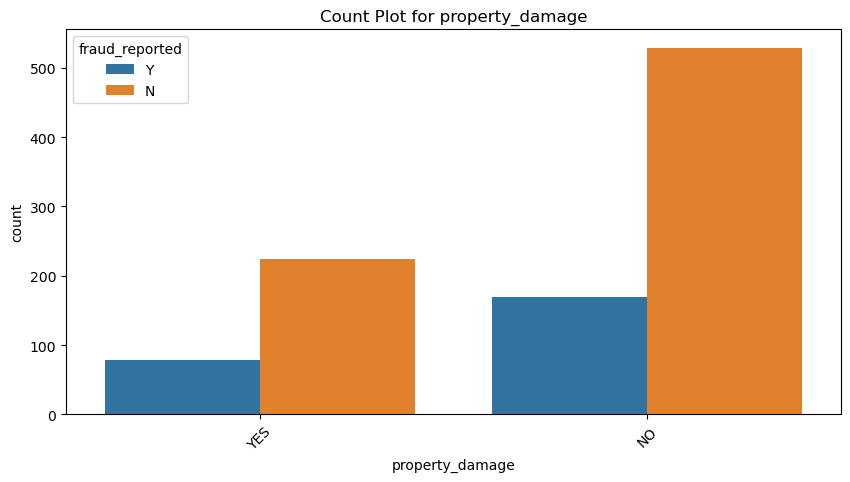

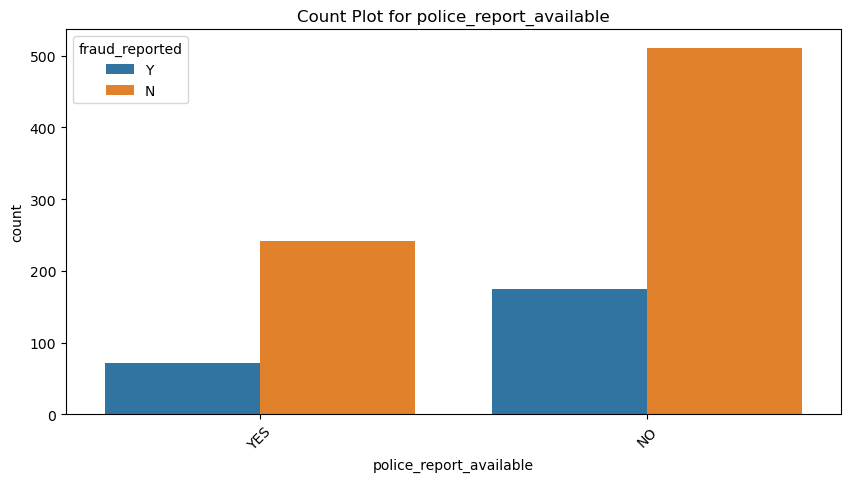

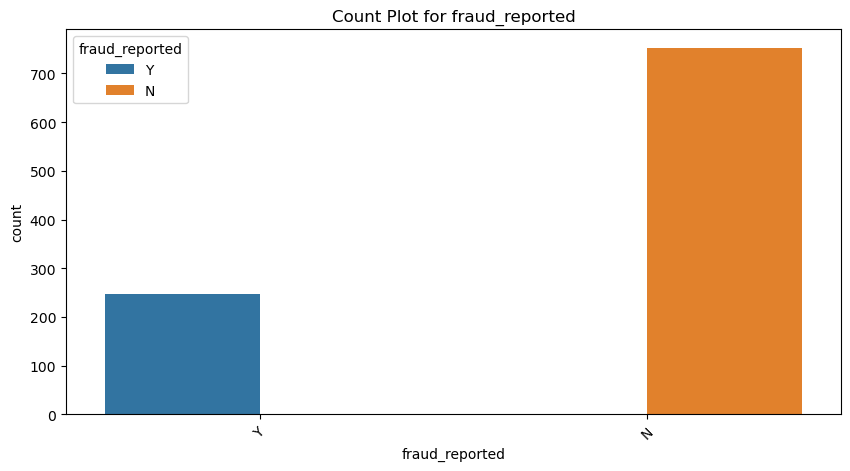

In [30]:
# Seleting Categorical column
cat_cols = df.select_dtypes(include=['object']).columns

# Ploting count plot for each categorical variable
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='fraud_reported', data=df)
    plt.title(f'Count Plot for {col}')  
    plt.xticks(rotation=45)  
    plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

# Label Encoding

In [32]:
# Label encoding categorical column

label_encoder = LabelEncoder()

# List of categorical columns for encoding
categorical_cols = ['property_damage', 'police_report_available', 'collision_type', 
                    'authorities_contacted', 'insured_sex', 'insured_education_level', 
                    'insured_occupation', 'insured_relationship', 'incident_type', 
                    'incident_severity',  'policy_csl','fraud_reported' ]

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [33]:
df.dtypes

months_as_customer               int64
age                              int64
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
fraud_reported           

# correlation matrix

In [187]:
# Plot correlation matrix

df.corr()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
months_as_customer,1.000000,0.922098,-0.026819,0.026807,0.005018,0.015498,0.060925,-0.000833,-0.002612,0.069727,...,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.020544
age,0.922098,1.000000,-0.015185,0.029188,0.014404,0.018126,0.073337,0.000969,0.000317,0.074832,...,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.012143
policy_csl,-0.026819,-0.015185,1.000000,0.003384,0.023978,0.021636,-0.010757,0.009153,0.078061,-0.030063,...,-0.019403,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.037190
policy_deductable,0.026807,0.029188,0.003384,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.058918,-0.022945,...,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,0.014817
policy_annual_premium,0.005018,0.014404,0.023978,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.027692,0.001925,...,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,-0.014480
umbrella_limit,0.015498,0.018126,0.021636,0.010870,-0.006247,1.000000,0.010688,-0.019357,-0.004243,0.077495,...,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,0.058622
insured_sex,0.060925,0.073337,-0.010757,-0.009733,0.038853,0.010688,1.000000,0.009002,0.018533,0.002855,...,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.030873
insured_education_level,-0.000833,0.000969,0.009153,0.015217,-0.019715,-0.019357,0.009002,1.000000,0.029987,-0.023488,...,-0.003768,-0.048909,-0.012072,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.008808
insured_occupation,-0.002612,0.000317,0.078061,-0.058918,0.027692,-0.004243,0.018533,0.029987,1.000000,-0.028589,...,-0.035684,0.016634,-0.001445,-0.026628,-0.015810,0.035315,0.017240,0.023033,0.039028,-0.032161
insured_relationship,0.069727,0.074832,-0.030063,-0.022945,0.001925,0.077495,0.002855,-0.023488,-0.028589,1.000000,...,-0.047354,-0.031931,-0.001214,0.002362,-0.017471,0.002229,0.029014,0.007332,-0.006256,0.021043


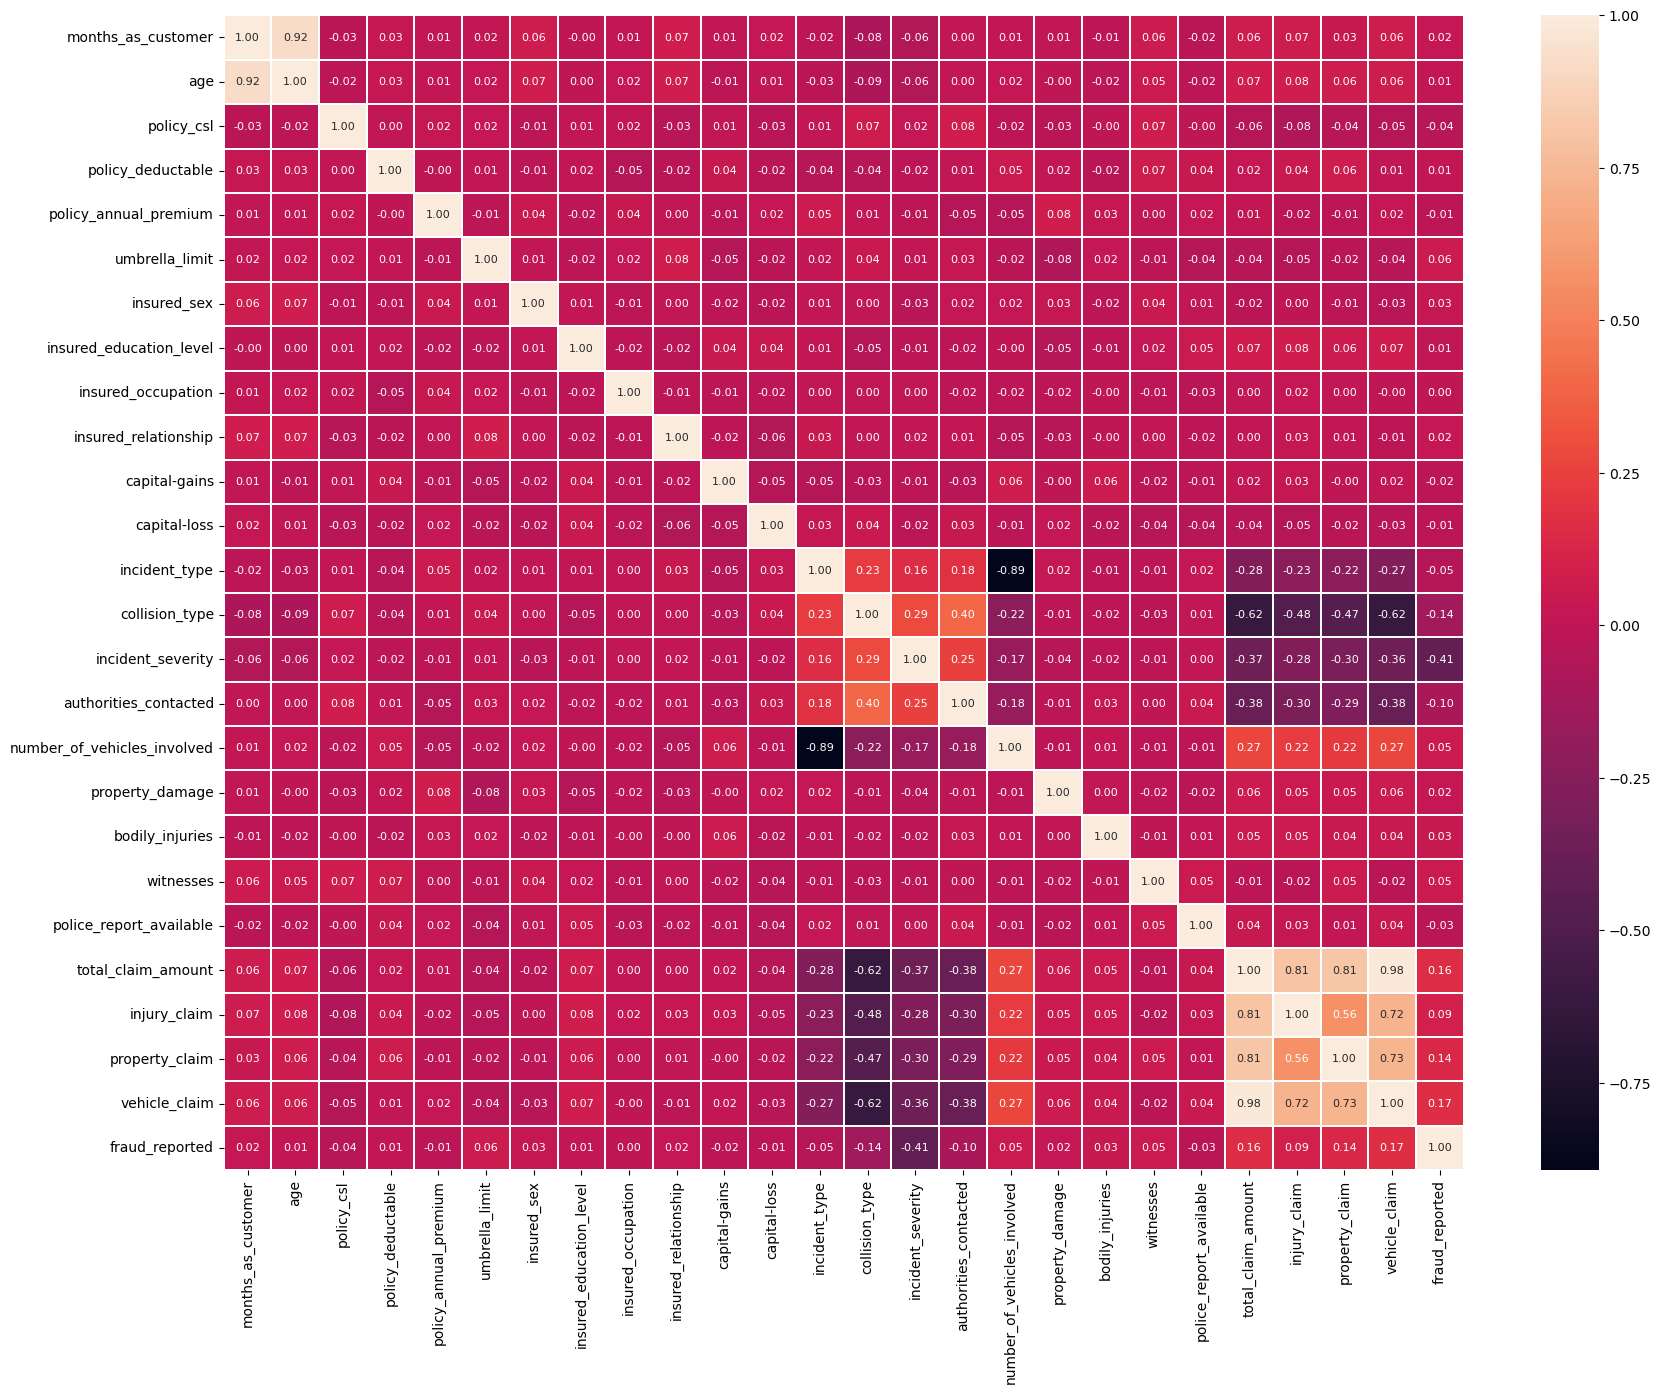

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':8}, linewidths=0.1,fmt="0.2f")
plt.show()

# skewness

In [41]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.301862
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098


In [43]:
# Created a copy of the original DataFrame 
df_transformed = df.copy()

# Selecting numerical columns
numerical_cols = df_transformed.select_dtypes(include=['int64', 'float64']).columns

# Initialization
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation to the numerical columns
df_transformed[numerical_cols] = pt.fit_transform(df_transformed[numerical_cols])

# To Check the skewness after transformation
skewness = df_transformed[numerical_cols].skew()
print("Skewness after transformation:")
print(skewness)

Skewness after transformation:
months_as_customer            -0.135661
age                           -0.001945
policy_deductable              0.023988
policy_annual_premium          0.004758
umbrella_limit                -7.865930
capital-gains                  0.038722
capital-loss                   0.090488
number_of_vehicles_involved    0.363693
bodily_injuries               -0.128799
witnesses                     -0.153648
total_claim_amount            -0.510354
injury_claim                  -0.415781
property_claim                -0.358814
vehicle_claim                 -0.522718
dtype: float64


# Checking Outliers

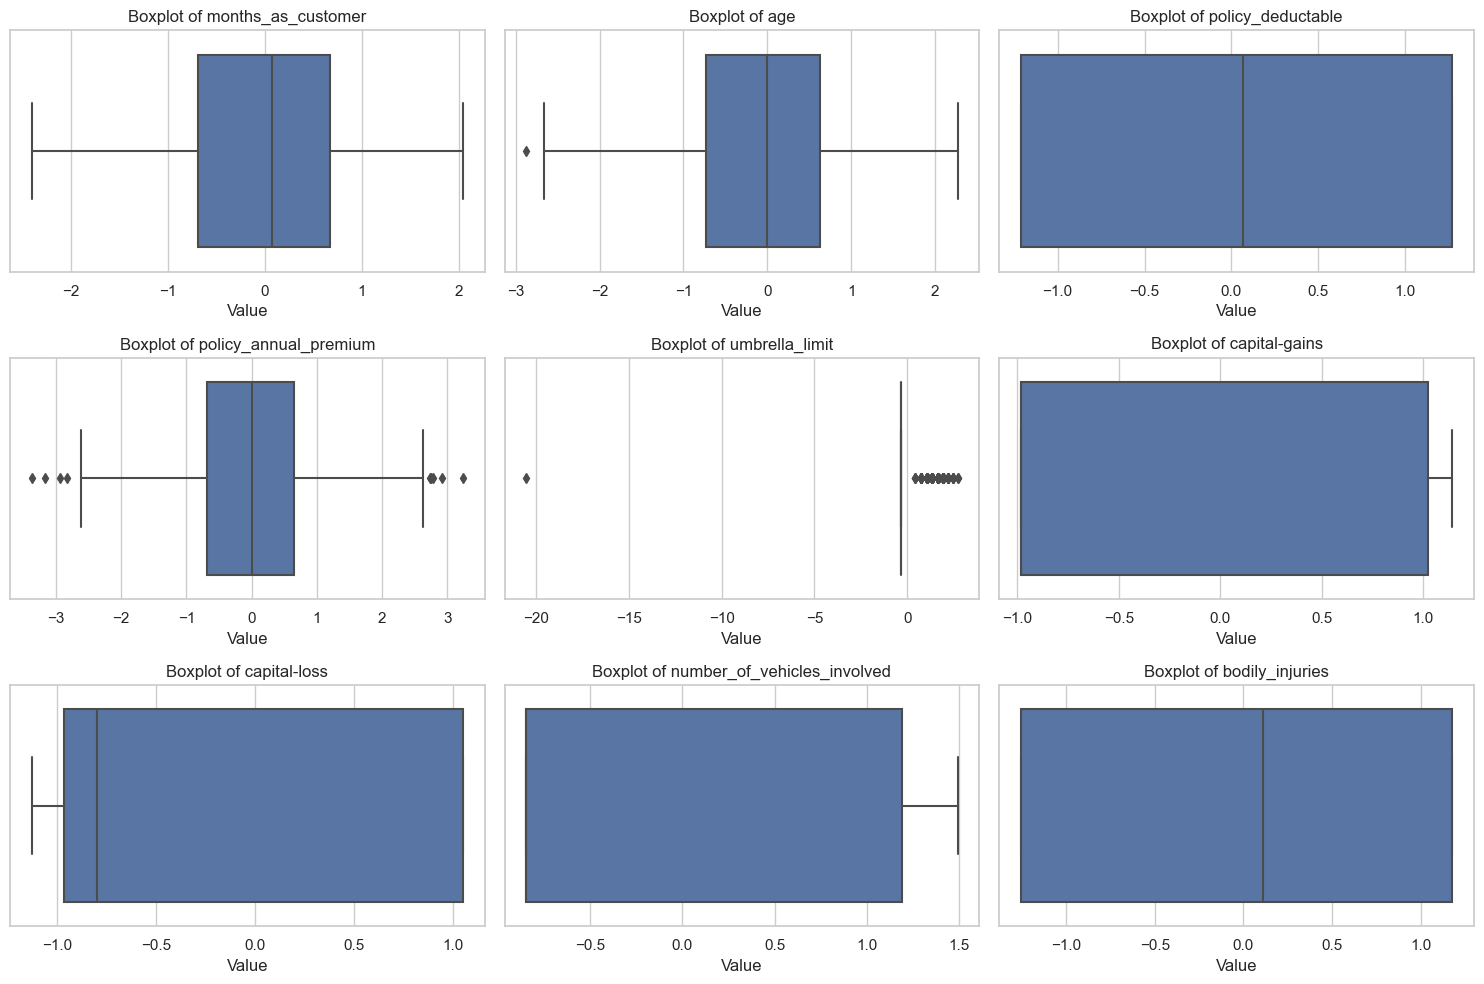

In [45]:
# plot
sns.set(style="whitegrid")

# Create boxplots 
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols[:9], 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=df_transformed[col])  
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

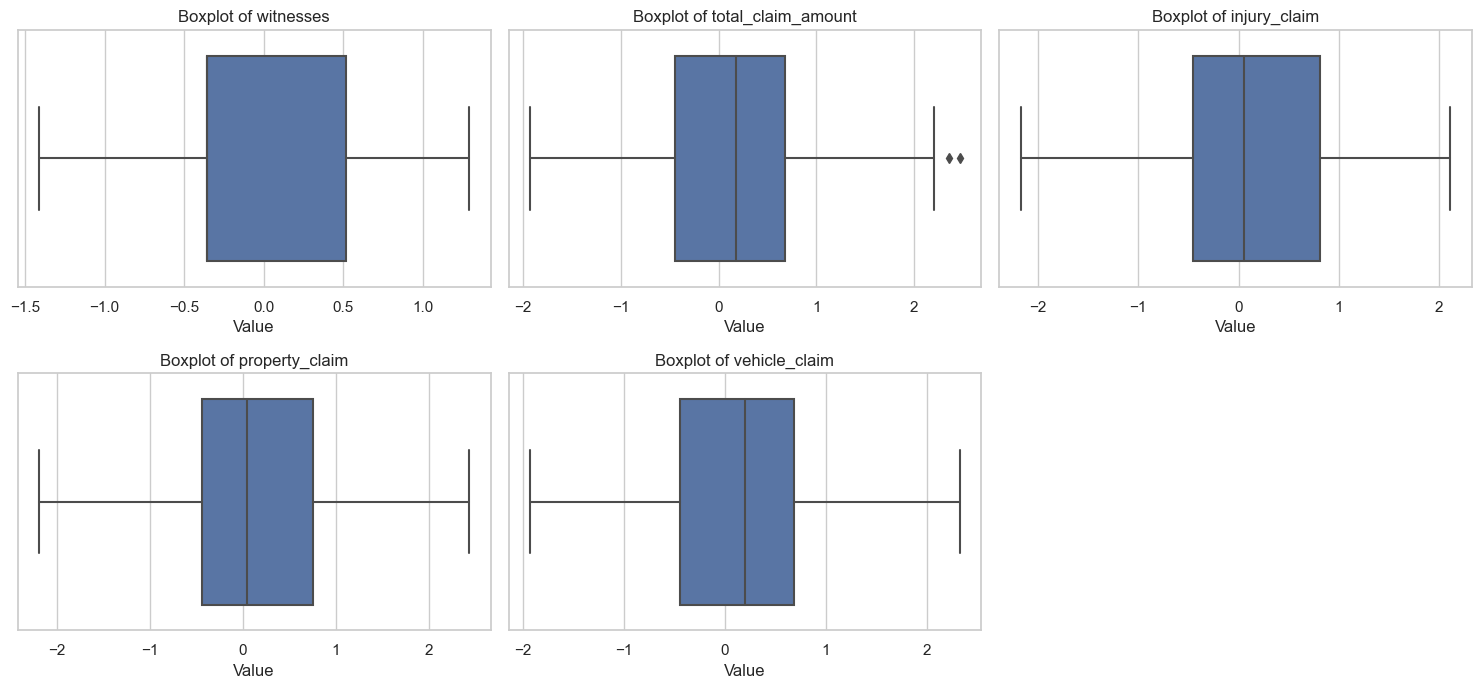

In [46]:
# Create boxplots 
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols[9:], 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=df_transformed[col])  
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Value')

plt.tight_layout()
plt.show()


# Identify Outliers

In [47]:
# Calculate the Z-scores for the numerical columns
z_scores = np.abs((df_transformed[numerical_cols] - df_transformed[numerical_cols].mean()) / df_transformed[numerical_cols].std())

# Define a threshold 
threshold = 3
outliers = (z_scores > threshold)

# Print 
outlier_counts = outliers.sum()
print("Number of outliers in each column:\n", outlier_counts)

Number of outliers in each column:
 months_as_customer             0
age                            0
policy_deductable              0
policy_annual_premium          3
umbrella_limit                 1
capital-gains                  0
capital-loss                   0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64


# Remove Outliers

In [48]:
# Filter out  outliers
df_cleaned = df_transformed[~outliers.any(axis=1)]

# Check
print(f"Original DataFrame shape: {df_transformed.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")


Original DataFrame shape: (1000, 26)
Cleaned DataFrame shape: (996, 26)


# Now seperating into features and target

In [49]:
# Define the target variable
target_variable = 'fraud_reported'

# Separate features and target variable
X = df_cleaned.drop(columns=[target_variable])  
y = df_cleaned[target_variable]                 

# Check 
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (996, 25)
Target shape: (996,)


# SMOTE smapling

In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check 
print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", y_train_resampled.value_counts())

Original dataset shape: fraud_reported
0    599
1    197
Name: count, dtype: int64
Resampled dataset shape: fraud_reported
0    599
1    599
Name: count, dtype: int64


# Scale the feature

In [53]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler 
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Check 
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)


Scaled training data shape: (1198, 25)
Scaled testing data shape: (200, 25)


# Model Training

# RandomForest

In [55]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Evaluate 
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[130  21]
 [ 15  34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       151
           1       0.62      0.69      0.65        49

    accuracy                           0.82       200
   macro avg       0.76      0.78      0.77       200
weighted avg       0.83      0.82      0.82       200



# Logistic Regression

In [57]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate 
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Confusion Matrix:
[[103  48]
 [ 14  35]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       151
           1       0.42      0.71      0.53        49

    accuracy                           0.69       200
   macro avg       0.65      0.70      0.65       200
weighted avg       0.77      0.69      0.71       200



# Decision Tree

In [58]:
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate 
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Confusion Matrix:
[[113  38]
 [ 17  32]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       151
           1       0.46      0.65      0.54        49

    accuracy                           0.72       200
   macro avg       0.66      0.70      0.67       200
weighted avg       0.77      0.72      0.74       200



# Gradient Boosting

In [59]:
# Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boosting_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_gb = gradient_boosting_model.predict(X_test_scaled)

# Evaluate 
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Confusion Matrix:
[[130  21]
 [ 16  33]]

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       151
           1       0.61      0.67      0.64        49

    accuracy                           0.81       200
   macro avg       0.75      0.77      0.76       200
weighted avg       0.82      0.81      0.82       200



# Hyperparameter tunning

RandomForest

In [61]:
# Create a smaller sample of the training data
sample_size = int(len(X_train_resampled) * 0.5)  
X_train_sample = X_train_resampled.sample(sample_size, random_state=42)
y_train_sample = y_train_resampled[X_train_sample.index]  


In [62]:
rf_param_grid = {
    'n_estimators': [50, 100], 
    'max_depth': [5, 10, None],  
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2],  
}

In [63]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid,cv=3,scoring='f1', n_jobs=-1)

In [64]:
rf_grid_search.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='f1')

In [65]:
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best F1 Score for Random Forest:", rf_grid_search.best_score_)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score for Random Forest: 0.8454706560776072


Gradient Boosting

In [66]:
gb_param_grid = {
    'n_estimators': [50, 100],  
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 5, 7],  
    'subsample': [0.8, 1.0], 
}

In [67]:
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),param_grid=gb_param_grid,cv=3,scoring='f1', n_jobs=-1) 

In [68]:
gb_grid_search.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             scoring='f1')

In [69]:
print("Best Parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best F1 Score for Gradient Boosting:", gb_grid_search.best_score_)

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score for Gradient Boosting: 0.8409833258130472


# cross validation

In [71]:
#Random forest

# Using the best parameters from the grid search
best_rf = RandomForestClassifier(
    n_estimators=rf_grid_search.best_params_['n_estimators'],
    max_depth=rf_grid_search.best_params_['max_depth'],
    min_samples_split=rf_grid_search.best_params_['min_samples_split'],
    min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'],
    random_state=42
)

# cross-validation
rf_cv_scores = cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Print 
print("Random Forest Cross-Validation F1 Scores:", rf_cv_scores)
print("Mean F1 Score for Random Forest:", rf_cv_scores.mean())


Random Forest Cross-Validation F1 Scores: [0.67676768 0.81081081 0.90980392 0.93172691 0.9140625 ]
Mean F1 Score for Random Forest: 0.8486343633555276


In [72]:
#Gradient Boosting

# Using the best parameters from the grid search
best_gb = GradientBoostingClassifier(
    n_estimators=gb_grid_search.best_params_['n_estimators'],
    learning_rate=gb_grid_search.best_params_['learning_rate'],
    max_depth=gb_grid_search.best_params_['max_depth'],
    subsample=gb_grid_search.best_params_['subsample'],
    random_state=42
)

# cross-validation
gb_cv_scores = cross_val_score(best_gb, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Print 
print("Gradient Boosting Cross-Validation F1 Scores:", gb_cv_scores)
print("Mean F1 Score for Gradient Boosting:", gb_cv_scores.mean())


Gradient Boosting Cross-Validation F1 Scores: [0.51648352 0.75117371 0.9140625  0.92430279 0.92307692]
Mean F1 Score for Gradient Boosting: 0.8058198874650498


so overall we found that the RandomForest is the best model fit for Detection

# Save the model

In [74]:
# Save the model
joblib.dump(best_rf, 'best_random_forest_model.pkl')

print("Random Forest model saved as 'best_random_forest_model.pkl'")


Random Forest model saved as 'best_random_forest_model.pkl'
